In [1]:
#import pandas.numpy,seaborn,matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#export datasets
results = pd.read_csv("results.csv")
shootouts =pd.read_csv("shootouts.csv")
#convert dateframe
df=pd.DataFrame(results)
df1=pd.DataFrame(shootouts)





In [2]:
#check our result data
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [3]:
#check our shootouts data
shootouts.head()

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-17,Thailand,South Korea,South Korea
3,1972-05-19,Thailand,Cambodia,Thailand
4,1973-04-21,Senegal,Ghana,Ghana


In [4]:
#merge our datas
merge = results.merge(shootouts,on=['home_team','away_team'],how='left')
merge.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_y,winner
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,NaN,NaN
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,NaN,NaN
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,NaN,NaN
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN


In [5]:
#deleted null value
merge.dropna()
#our new data
merge.head()



,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_y,winner
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,NaN,NaN
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,NaN,NaN
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,NaN,NaN
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN


In [6]:
#select the columns that need
data=merge[['date_x','home_team','away_team','home_score','away_score','tournament','city']]
data.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow


In [7]:
#select the Turkey matches
Turkey_matches = data[(data['home_team'] =='Turkey') | (data['away_team'] =='Turkey')]
Turkey_matches.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city
782,1923-10-26,Turkey,Romania,2.0,2.0,Friendly,Istanbul
853,1924-06-17,Finland,Turkey,2.0,4.0,Friendly,Helsinki
854,1924-06-19,Estonia,Turkey,1.0,4.0,Friendly,Tallinn
856,1924-06-22,Latvia,Turkey,1.0,3.0,Friendly,Riga
859,1924-06-29,Poland,Turkey,2.0,0.0,Friendly,Łódź


In [8]:
#seperated world cup's and uefa's matches
FIFA_World_Cup =Turkey_matches[(Turkey_matches['tournament']=='FIFA World Cup') | (Turkey_matches['tournament']=='FIFA World Cup qualification') ]
UEFA_Euro = Turkey_matches[(Turkey_matches['tournament']=='UEFA Euro') | (Turkey_matches['tournament']=='UEFA Euro qualification') ]




In [9]:
#check world cup data
FIFA_World_Cup.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city
3202,1949-11-20,Turkey,Syria,7.0,0.0,FIFA World Cup qualification,Ankara
3764,1954-01-06,Spain,Turkey,4.0,1.0,FIFA World Cup qualification,Madrid
3783,1954-03-14,Turkey,Spain,1.0,0.0,FIFA World Cup qualification,Istanbul
3784,1954-03-17,Turkey,Spain,2.0,2.0,FIFA World Cup qualification,Rome
3839,1954-06-17,Germany,Turkey,4.0,1.0,FIFA World Cup,Berne


In [10]:
# check uefa
UEFA_Euro.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city
4682,1958-11-02,Romania,Turkey,3.0,0.0,UEFA Euro qualification,Bucharest
4748,1959-04-26,Turkey,Romania,2.0,0.0,UEFA Euro qualification,Istanbul
5565,1962-12-02,Italy,Turkey,6.0,0.0,UEFA Euro qualification,Bologna
5647,1963-03-27,Turkey,Italy,0.0,1.0,UEFA Euro qualification,Istanbul
6700,1966-11-16,Republic of Ireland,Turkey,2.0,1.0,UEFA Euro qualification,Dublin


In [11]:
#convert the data type to float from int
FIFA_World_Cup[["home_score","away_score"]]=FIFA_World_Cup[["home_score","away_score"]].astype(int)
UEFA_Euro[["home_score","away_score"]]=UEFA_Euro[["home_score","away_score"]].astype(int)
#convert the data type datetime
FIFA_World_Cup['date_x']=pd.to_datetime(FIFA_World_Cup['date_x'])
UEFA_Euro['date_x']=pd.to_datetime(UEFA_Euro['date_x'])

C:\Users\PC\AppData\Local\Temp\ipykernel_15108\387267367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FIFA_World_Cup[["home_score","away_score"]]=FIFA_World_Cup[["home_score","away_score"]].astype(int)
C:\Users\PC\AppData\Local\Temp\ipykernel_15108\387267367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UEFA_Euro[["home_score","away_score"]]=UEFA_Euro[["home_score","away_score"]].astype(int)
C:\Users\PC\AppData\Local\Temp\ipykernel_15108\387267367.py:3: SettingWithCopyWarning: 
A value is tryin

In [12]:
FIFA_World_Cup.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city
3202,1949-11-20,Turkey,Syria,7,0,FIFA World Cup qualification,Ankara
3764,1954-01-06,Spain,Turkey,4,1,FIFA World Cup qualification,Madrid
3783,1954-03-14,Turkey,Spain,1,0,FIFA World Cup qualification,Istanbul
3784,1954-03-17,Turkey,Spain,2,2,FIFA World Cup qualification,Rome
3839,1954-06-17,Germany,Turkey,4,1,FIFA World Cup,Berne


In [13]:
UEFA_Euro.head()


,date_x,home_team,away_team,home_score,away_score,tournament,city
4682,1958-11-02,Romania,Turkey,3,0,UEFA Euro qualification,Bucharest
4748,1959-04-26,Turkey,Romania,2,0,UEFA Euro qualification,Istanbul
5565,1962-12-02,Italy,Turkey,6,0,UEFA Euro qualification,Bologna
5647,1963-03-27,Turkey,Italy,0,1,UEFA Euro qualification,Istanbul
6700,1966-11-16,Republic of Ireland,Turkey,2,1,UEFA Euro qualification,Dublin


In [14]:
# create new column for Turkey's points in world cup
all_list = list()
for item in FIFA_World_Cup.index:
    if FIFA_World_Cup['home_score'][item] > FIFA_World_Cup['away_score'][item] and FIFA_World_Cup['home_team'][item] == 'Turkey':
        all_list.append(3)
    elif FIFA_World_Cup['home_score'][item] == FIFA_World_Cup['away_score'][item]:
        all_list.append(1)
    else:
        all_list.append(0)
FIFA_World_Cup['point'] = all_list
FIFA_World_Cup.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_15108\2126627312.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FIFA_World_Cup['point'] = all_list


,date_x,home_team,away_team,home_score,away_score,tournament,city,point
3202,1949-11-20,Turkey,Syria,7,0,FIFA World Cup qualification,Ankara,3
3764,1954-01-06,Spain,Turkey,4,1,FIFA World Cup qualification,Madrid,0
3783,1954-03-14,Turkey,Spain,1,0,FIFA World Cup qualification,Istanbul,3
3784,1954-03-17,Turkey,Spain,2,2,FIFA World Cup qualification,Rome,1
3839,1954-06-17,Germany,Turkey,4,1,FIFA World Cup,Berne,0


In [15]:
# create new column for Turkey's points in uefa 
all_list_1 = list()
for item_1 in UEFA_Euro.index:
    if UEFA_Euro['home_score'][item_1] > UEFA_Euro['away_score'][item_1] and UEFA_Euro['home_team'][item_1] == 'Turkey':
        all_list_1.append(3)
    elif UEFA_Euro['home_score'][item_1] == UEFA_Euro['away_score'][item_1]:
        all_list_1.append(1)
    else:
        all_list_1.append(0)
UEFA_Euro['Point'] = all_list_1
UEFA_Euro.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_15108\4137171373.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UEFA_Euro['Point'] = all_list_1


,date_x,home_team,away_team,home_score,away_score,tournament,city,Point
4682,1958-11-02,Romania,Turkey,3,0,UEFA Euro qualification,Bucharest,0
4748,1959-04-26,Turkey,Romania,2,0,UEFA Euro qualification,Istanbul,3
5565,1962-12-02,Italy,Turkey,6,0,UEFA Euro qualification,Bologna,0
5647,1963-03-27,Turkey,Italy,0,1,UEFA Euro qualification,Istanbul,0
6700,1966-11-16,Republic of Ireland,Turkey,2,1,UEFA Euro qualification,Dublin,0


In [16]:
#compute the sum,count,mean for each world cup tournament
Turkey_w=FIFA_World_Cup.groupby(["tournament",FIFA_World_Cup["date_x"].dt.year])['point'].agg([np.sum,'count',np.mean])
Turkey_w.head()

sum  count      mean
tournament                   date_x                      
FIFA World Cup               1954      0      3  0.000000
                             2002      4      7  0.571429
FIFA World Cup qualification 1949      3      1  3.000000
                             1954      4      3  1.333333
                             1961      3      4  0.750000

In [17]:
##compute the sum,count,mean for each uefa tournament
Turkey_u=UEFA_Euro.groupby(["tournament",UEFA_Euro["date_x"].dt.year])['Point'].agg([np.sum,'count',np.mean])
Turkey_u.head()


sum  count  mean
tournament date_x                  
UEFA Euro  1996      0      3  0.00
           2000      1      4  0.25
           2008      4      5  0.80
           2016      0      3  0.00
           2021      0      3  0.00

<AxesSubplot:xlabel='date_x', ylabel='sum'>

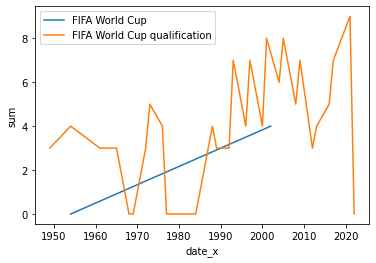

In [18]:
x= Turkey_w.query("tournament=='FIFA World Cup'")
y= Turkey_w.query("tournament=='FIFA World Cup qualification'")
w= Turkey_u.query("tournament=='UEFA Euro'")
z= Turkey_u.query("tournament=='UEFA Euro qualification'")
sns.lineplot(data=x,x='date_x',y='sum',label='FIFA World Cup')
sns.lineplot(data=y,x='date_x',y='sum',label='FIFA World Cup qualification')




<AxesSubplot:xlabel='date_x', ylabel='sum'>

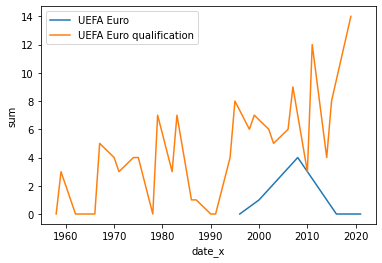

In [19]:
sns.lineplot(data=w,x='date_x',y='sum',label='UEFA Euro')
sns.lineplot(data=z,x='date_x',y='sum',label='UEFA Euro qualification')

In [20]:
#import request and bs4 for web scraping
import requests
from bs4 import BeautifulSoup

In [21]:
url ="https://www.tff.org/default.aspx?pageID=321"
R=requests.get(url)
soup=BeautifulSoup(R.text,'html.parser')
table = soup.find('div',{'id':'ctl00_MPane_m_321_1472_ctnr_div'}).tbody
rows=table.find_all('tr')
columns=[v.text for v in rows[0].find_all('td')]
df3=pd.DataFrame(columns=columns)
for i in range(1,len(rows)):
    name=rows[i].find_all('td')
    
    if len(name)==2:
        values=[name[0].text.replace('\n',''),name[1].text.replace('\n','')]
    else:
        values =[a.text.replace('\n','') for a in name]
    
    df3 = df3.append(pd.Series(values,index=columns),ignore_index=True)
    df3.to_csv(r'C:\Users\PC\Desktop\proje\matches'+'\\coach.csv',index=False)
    
    

C:\Users\PC\AppData\Local\Temp\ipykernel_15108\1915794742.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(pd.Series(values,index=columns),ignore_index=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_15108\1915794742.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(pd.Series(values,index=columns),ignore_index=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_15108\1915794742.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(pd.Series(values,index=columns),ignore_index=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_15108\1915794742.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\PC\AppData\Local\Temp\ipykernel_15108\1915794742.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(pd.Series(values,index=columns),ignore_index=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_15108\1915794742.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(pd.Series(values,index=columns),ignore_index=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_15108\1915794742.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(pd.Series(values,index=columns),ignore_index=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_15108\1915794742.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

In [22]:
#export the csv dataset that I scraped 
coachs = pd.read_csv("coach.csv")
coachs=pd.DataFrame(coachs)
coachs.head()

,\nTeknik Direktörler,\nDönemi
0,Ali Sami Yen (V. 29.10.1951),26.10.1923
1,Billy Hunter (V.),25.05.1924 - 12.09.1926
2,Bela Toth (V.),14.10.1927 - 28.05.1928
3,Fred Pagnam (V. 07.03.1962),27.09.1931 - 22.04.1932
4,James Elliot Donnelly (V.),12.07.1936 - 01.08.1937


In [23]:
#cleaning data
coachs.columns = coachs.columns.str.replace('\n','')
print(coachs.head())

             Teknik Direktörler                    Dönemi
0  Ali Sami Yen (V. 29.10.1951)                26.10.1923
1             Billy Hunter (V.)  25.05.1924 - 12.09.1926 
2                Bela Toth (V.)   14.10.1927 - 28.05.1928
3   Fred Pagnam (V. 07.03.1962)   27.09.1931 - 22.04.1932
4    James Elliot Donnelly (V.)  12.07.1936 - 01.08.1937 


In [24]:
#seperate dönemi column 
coachs[['start_date','finish_date']]=coachs['Dönemi'].str.split('-', 1, expand=True)
#cleaning data
coachs['start_date']=coachs['start_date'].str.strip()
coachs['finish_date']=coachs['finish_date'].str.strip()
coachs['start_date']=coachs['start_date'].fillna('')
coachs['finish_date']=coachs['finish_date'].fillna('')

In [25]:
coachs=coachs.drop(columns=['Dönemi'])
#fixed error 
coachs=coachs.replace('19.021956','19.02.1956')
coachs.head()

,Teknik Direktörler,start_date,finish_date
0,Ali Sami Yen (V. 29.10.1951),26.10.1923,
1,Billy Hunter (V.),25.05.1924,12.09.1926
2,Bela Toth (V.),14.10.1927,28.05.1928
3,Fred Pagnam (V. 07.03.1962),27.09.1931,22.04.1932
4,James Elliot Donnelly (V.),12.07.1936,01.08.1937


In [26]:
#checking the missing value
coachs.isnull().sum()

Teknik Direktörler    0
start_date            0
finish_date           0
dtype: int64

In [27]:
#convert the datetime
from datetime import datetime 
coachs['finish_date']=coachs['finish_date'].apply(lambda date: datetime.strptime(date,'%d.%m.%Y') if date !=''else np.nan)
coachs['start_date']=coachs['start_date'].apply(lambda date: datetime.strptime(date,'%d.%m.%Y'))
coachs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Teknik Direktörler  60 non-null     object        
 1   start_date          60 non-null     datetime64[ns]
 2   finish_date         46 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 1.5+ KB


In [28]:
coachs.head()

,Teknik Direktörler,start_date,finish_date
0,Ali Sami Yen (V. 29.10.1951),1923-10-26,NaT
1,Billy Hunter (V.),1924-05-25,1926-09-12
2,Bela Toth (V.),1927-10-14,1928-05-28
3,Fred Pagnam (V. 07.03.1962),1931-09-27,1932-04-22
4,James Elliot Donnelly (V.),1936-07-12,1937-08-01


In [29]:
#select year
coachs['start_date']=coachs['start_date'].dt.year
coachs['finish_date']=coachs['finish_date'].dt.year
coachs.head()

,Teknik Direktörler,start_date,finish_date
0,Ali Sami Yen (V. 29.10.1951),1923,NaN
1,Billy Hunter (V.),1924,1926.0
2,Bela Toth (V.),1927,1928.0
3,Fred Pagnam (V. 07.03.1962),1931,1932.0
4,James Elliot Donnelly (V.),1936,1937.0


In [30]:
#select dates grater than 1950
coachs = coachs.query("start_date >= 1950")
coachs.head()

,Teknik Direktörler,start_date,finish_date
8,James McCormick (V. 03.01.1968),1950,NaN
9,Rebii Erkal (V. 24.11.1985),1951,1951.0
10,Sandro Puppo (V. 16.10.1989),1952,1954.0
11,Gündüz Kılıç (V. 17.05.1980),1954,NaN
12,Zarko Mihajloviç (V. 16.09.1986),1955,1955.0


In [31]:
#merge coachs and world cup datas
coach_Turkey_w=Turkey_w.merge(coachs,left_on='date_x',right_on='start_date',how='inner')
coach_Turkey_w.head()

,sum,count,mean,Teknik Direktörler,start_date,finish_date
0,0,3,0.000000,Gündüz Kılıç (V. 17.05.1980),1954,NaN
1,4,3,1.333333,Gündüz Kılıç (V. 17.05.1980),1954,NaN
2,3,6,0.500000,Doğan Andaç (V. 06.02.2013),1965,1965.0
3,3,6,0.500000,Sandro Puppo (V. 16.10.1989),1965,1966.0
4,0,2,0.000000,Şükrü Mustafa Gülesin (V. 10.07.1977),1969,NaN


In [32]:
#merge coachs and uefa datas
coach_Turkey_u=Turkey_u.merge(coachs,left_on='date_x',right_on='start_date',how='inner')
coach_Turkey_u.head()

,sum,count,mean,Teknik Direktörler,start_date,finish_date
0,0,3,0.00,Mustafa Denizli,1996,2000.0
1,1,4,0.25,Şenol Güneş,2000,2004.0
2,0,3,0.00,Stefan Kuntz,2021,NaN
3,0,1,0.00,Leandro Remondini (V. 09.01.1979),1958,1959.0
4,0,1,0.00,Şeref Görkey (V. 10.11.2004),1962,NaN


In [33]:
# grouping by teknik direktörler
group_w=coach_Turkey_w.groupby(['Teknik Direktörler'])['sum'].agg({np.sum})
group_w

,sum
Teknik Direktörler,
Abdullah Gegic (V. 21.06.2008),0
Candan Tarhan (V. 18.04.1989),0
Coşkun Özarı (V. 22.06.2011),4
Doğan Andaç (V. 06.02.2013),7
Ersun Yanal,6
Fatih Terim,19
Fethi Demircan,0
Gündüz Kılıç (V. 17.05.1980),4
Kalman Meszöly,1


In [34]:
# grouping by teknik direktörler
group_u=coach_Turkey_u.groupby(['Teknik Direktörler'])['sum'].agg({np.sum})
group_u

,sum
Teknik Direktörler,
Abdullah Avcı,12
Adnan Süvari (V. 06.06.1991),0
Bülent Eken (V. 25.07.2016),0
Cihat Arman (V. 14.05.1994),3
Coşkun Özarı (V. 22.06.2011),3
Doğan Andaç (V. 06.02.2013),4
Fatih Terim (Antrenör),0
Guus Hiddink,3
Leandro Remondini (V. 09.01.1979),0


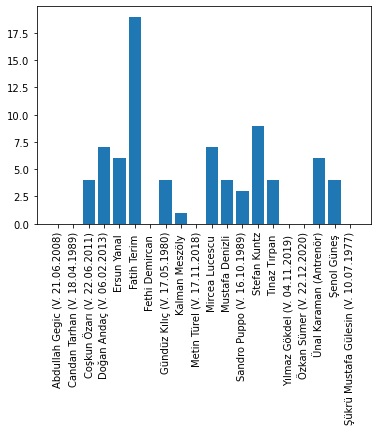

In [35]:
# convert to index from column
group_w=group_w.reset_index()
#visiluation 
plt.bar('Teknik Direktörler','sum',data=group_w)
plt.xticks(rotation='vertical')
plt.show()

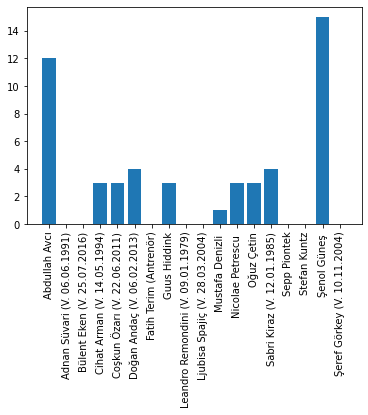

In [36]:
# convert to index from column
group_u=group_u.reset_index()
#visiluation
plt.bar('Teknik Direktörler','sum',data=group_u)
plt.xticks(rotation='vertical')
plt.show()